# Generalized Langevin Equation integration

Following *Andrew D. Baczewski1 and Stephen D. Bond Numerical Integration of the Extended Variable Generalized Langevin Equation with a
Positive Prony Representable Memory Kernel*.

The **General Langevin Equation (GLE)** explains the movement of a particle for more general viscoelastic fluids and solids. We thus assume no specific form of the resistance or memory function $\Gamma (t-t')$, other than causality.

$$
\begin{cases}
m \frac{d\bold{v}}{dt} = \bold{F^c}(\bold{x}(t)) + \bold{F^r}(t) - \int_{0}^{t}{\Gamma (t-t') \bold{v}(t')dt'} \\
\bold{v(t)} = \frac{d\bold{x}(t)}{dt}
\end{cases}
$$

with initial conditions $\bold{x}(0) = \bold{x_0}$ and $\bold{v}(0) = \bold{v_0}$. $F^c$ is a conservative force and $F^r$ is a random force, that must satisfy the Fluctuation-Dissipation Theorem (FDT):

$$
\langle F_i^r(t') F_j^r(t) \rangle = k_B T \; \Gamma (t-t') \; \delta_{ij}
$$

Subscripts $i$ and $j$ denote the different components of the vector.

In order to solve this general equation with correlated noise, we assume that the memory kernel function can be represented as a Prony series of decaying exponentials with $N_k$ terms.

$$
\Gamma (t) = \sum_{k=1}^{N_k}{\frac{c_k}{\tau_k} \exp[-t / \tau_k]} \; \; \; \;\text{ for } t \ge 0
$$

where $c_k$ and $\tau_k$ are fitting parameters. We will discuss in following sections how to obtain these fitting parameters. We can now define an extended variable $Z_{i,k} (t)$:

$$
Z_{i,k}(t) = - \int_{0}^{t}{\frac{c_k}{\tau_k} \exp[- (t - t') / \tau_k] v_i (t') dt'} 
$$

and making use of $Z_{i,k} (t)$ we can rewrite the GLE for each spatial component:

$$
\begin{cases}
m dv_i = F_i^c (\bold{x}(t))dt + \sum_{k=1}^{N_k}{Z_{i,k} (t) dt} + F_i^r (t) dt \\
dx_i (t) = v_i (t) dt
\end{cases}
$$

Now, instead of writing $Z_{i,k} (t)$ in integral form, we can write it in differential form to obtain a Stochastical Differential Equation (SDE).

$$
dZ_{i,k} (t) = - \frac{1}{\tau_k} Z_{i,k} (t) dt - \frac{c_k}{\tau_k} v_i (t) dt
$$

This way, we can couple this equation with the previous set and solve them as a system, obtaining $x_i$, $v_i$ and $z_{i,k}$ without the need of computing the integral.

Let us now face the contribution of the random force $F^r$ to make it obey the FDT. To this end, we consider the following SDE

$$
dF_{i,k} (t) = - \frac{1}{\tau_k} F_{i,k} (t) dt + \frac{1}{\tau_k} \sqrt{2 k_B T c_k} dW_{i,k} (t)
$$

If $W_{i,k}$ is a standard Wiener process, this SDE corresponds to an Ornstein-Uhlenbeck (OU) process. Using the OU properties, one can see that:

$$
\langle F_{i,k} (t') F_{i,k} (t) \rangle = k_B T \frac{c_k}{\tau_k} \exp[-(t-t') / \tau_k]
$$

and we can straightforwardly write:

$$
F_i^r (t) = \sum_{k=1}^{N_k}{F_{i,k} (t)}
$$

Combining both results, we can define the final extended variable $S_{i,k} (t) = Z_{i,k} (t) + F_{i,k} (t)$ and achieve a final expression for our set of equations:

$$
\begin{cases}
m dv_i = F_i^c (\bold{x}(t))dt + \sum_{k=1}^{N_k}{S_{i,k} (t) dt} \\
dx_i (t) = v_i (t) dt \\
dS_{i,k} (t) = - \frac{1}{\tau_k} S_{i,k} (t) dt - \frac{c_k}{\tau_k} v_i (t) dt + \frac{1}{\tau_k} \sqrt{2 k_B T c_k} dW_{i,k} (t)
\end{cases}
$$

**Note**: It can be shown, that in the limit of small $\tau_k$, the GLE converges to the Newtonian Langevin equation (see original paper).

### Equation integration

We assume a constant timestep $\Delta t$ and we will use the notation $x_i (n\Delta t) = x_i^n$. Therefore, having the values $x_i^n$, $v_i^n$ and $s_{i,k}^n$, we will update to the $(n+1)$th time step following this method:

1. Update $v_i$ by a half step:
   $$
   v_i^{n+1/2} = v_i^n + \frac{\Delta t}{2 m} F_i^c(x^n) + \frac{\Delta t}{2 m} \sum_{k=1}^{N_k}{S_{i,k}^n}
   $$
2. Update $x_i$ by a full step:
   $$
   x_i^{n+1} = x_i^n + \Delta t v_i^{n+1/2}
   $$
3. Update $S_{i,k}$ a by a full step:
   $$
   S_{i,k}^{n+1} = \theta_k S_{i,k}^n - (1 - \theta_k) c_k v_i^{n+1/2} + \alpha_k \sqrt{2 k_B T c_k} B_{i,k}^n
   $$
4. Update $v_i$ by another half step:
   $$
   v_i^{n+1} = v_i^{n+1/2} + \frac{\Delta t}{2 m} F_i^c(x^{n+1}) + \frac{\Delta t}{2 m} \sum_{k=1}^{N_k}{S_{i,k}^{n+1}}
   $$

B_{i,k}^n is a random number chosen from a Gaussian distribution of zero mean and variance unity $N(0,1)$. The real-valued parameters $\theta_k$ and $\alpha_k$ can be obtained by different method, but always satisfying;

$$
\theta_k = 1 - \frac{\Delta t}{\tau_k} + \mathcal{O} (\Delta t^2)
$$

$$
\alpha_k = \frac{\sqrt{\Delta t}}{\tau_k} + \mathcal{O}(\Delta t)
$$

In the original article, there are three proposals to choose $\theta_k$ and $\alpha_k$:

* Method 1: Euler-Maruyama scheme:
   $$
   \theta_k = 1 - \frac{\Delta t}{\tau_k}
   \; \; \; \text{ and } \; \; \;
   \alpha_k = \frac{\sqrt{\Delta t}}{\tau_k}
   $$
* Method 2: Keeping $v_i$ constant, the equation for $S_{i,k}$ can be solved exactly, obtaining:
   $$
   \theta_k = \exp{(- \Delta t / \tau_k)}
   \; \; \; \text{ and } \; \; \;
   \alpha_k = \sqrt{\frac{1 - \theta_k^2}{2 \tau_k}}
   $$
* Method 3: Modified version of Method 2 to improve stability as $\tau_k$ goes to zero.
   $$
   \theta_k = \exp{(- \Delta t / \tau_k)}
   \; \; \; \text{ and } \; \; \;
   \alpha_k = \sqrt{\frac{(1 - \theta_k)^2}{2 \tau_k}}
   $$

### Prony's series fitting

To implement the previously discussed method, we need to express the kernel function $\Gamma (t) $ as a sum of $N_k$ decaying exponential functions:

$$
\Gamma (t) = \sum_{k=1}^{N_k}{\frac{c_k}{\tau_k} \exp{[- t / \tau_k]}}
$$

with $c_k$ and $\tau_k$ as fitting parameters. To obtain these parameters, we use the Prony method, implemented as described [here](http://sachinashanbhag.blogspot.com/2017/09/prony-method.html). This function takes as arguments: (i) a time vector, (ii) the $\Gamma$ function evaluated at the times contained in the vector, and (iii) $N_k$ the number of terms in the sum. It returns two parameters $a_k$ and $b_k$, the coefficients multiplying the base of the exponential and the exponent ($a_k \exp{[-b_k t]}$). which can be easily converted to our parameters of interest.

$$
\tau_k = \frac{1}{b_k} \\
c_k = a_k \tau_k
$$

### Newtonian component. The Jeffreys model case.

The memory kernel of a simple Newtonian fluid is a Dirac's delta $\Gamma (t) = 2 \zeta \delta (t)$, which recovers an instantaneous friction and zero-mean Gaussian white noise.

A case of special interest is the combination of this Newtonian component with other viscoelastic contributions, with a general expression like:

$$
\Gamma(t) = 2 \zeta \delta(t) + \Gamma_m (t)
$$

A particular example is the Jeffreys fluid, which adds additional exponential memory to the instantaneous friction, resulting in the following temporal dependency [[Ref]](https://doi.org/10.1103/PhysRevE.105.044610) [[Ref]](https://doi.org/10.1088/1367-2630/ab40e0):

$$
\Gamma(t) = \zeta \left( 2 \delta(t) + \frac{\Delta}{\tau} \exp(-t / \tau) \right)
$$

For these memory kernels, the GLE can be expressed:

$$
m \frac{d\bold{v}}{dt} = \bold{F^c} (\bold{x} (t)) - \zeta \bold{v} (t) - \int_{0}^{t}{\Gamma_m (t-t') \bold{v} (t') dt'} + \bold{F_N^r} (t) + \bold{F_m^r} (t)
$$

Where we can see the random force due to the Newtonian contribution and its viscoelastic counterpart as separate contributions [[Ref]](https://doi.org/10.1137/17M1131660) [[Ref]](https://doi.org/10.1088/1361-6544/ab74af). This way, following the same analysis than in the previous section, we can write the viscoelastic part as a Prony series

$$
\Gamma_m (t) = \sum_{k=1}^{N_k}{\frac{c_k}{\tau_k} \exp[-t / \tau_k]}
$$

and the set of equations to integrate now is:

$$
\begin{cases}
m dv_i = F_i^c (\bold{x}(t))dt - \zeta v_i (t) dt + F_{N,i}^r (t) dt + \sum_{k=1}^{N_k}{S_{i,k} (t) dt} \\
dx_i (t) = v_i (t) dt \\
dS_{i,k} (t) = - \frac{1}{\tau_k} S_{i,k} (t) dt - \frac{c_k}{\tau_k} v_i (t) dt + \frac{1}{\tau_k} \sqrt{2 k_B T c_k} dW_{i,k} (t)
\end{cases}
$$

where $F_{N,i}^r$ can be generated as a simple Gaussian random variable with zero mean and variance $\sigma^2 = 2 \zeta k_B T$.

#### Inertialess limit

In this particular case of a two-contribution memory kernel, it is easy to integrate neglecting inertia ($m \rightarrow 0$), which is a usually a correct assumption in many colloidal systems. Thus, considering $m \frac{dv_i}{dt} (t) \approx 0$, we get an overdamped equation:

$$
0 = F_i^c (\bold{x}(t))dt - \zeta v_i (t) dt + F_{N,i}^r (t) dt + \sum_{k=1}^{N_k}{S_{i,k} (t) dt}
$$

which can be easily integrated by directly computing $v_i$ in each time step:

$$
v_i^n = \frac{1}{\zeta} \left( F_i^c (x^n) + \sqrt{\frac{2 \zeta k_b T}{\Delta t}} B_{N,i}^n + \sum_{k=1}^{N_k}{S_{i,k}^{n+1}} \right)
$$

with $B_{N,i}^n$ a random number picked from a random normal distribution $N(0,1)$.

## Power-law memory function

A material with a power-law response has a kernel memory function [Ref](https://books.google.es/books/about/Microrheology.html?id=u583DwAAQBAJ&redir_esc=y):

$$
\Gamma (t) = K t^{-n}
$$

with $0 < n < 1$. Whether the material response is dominated by viscous or elastic behavior depends on the value of $n$. For $n > 1/2$ the loss modulus has larger magnitude than the storage modulus, while when $n < 1/2$ the storage modulus has a larger magnitude. This power-law rheology arises when a hierarchy of relaxation time scales are established by a microstructure that is self-similar over a wide range of length scales. This fractal structure is present in many materials and processes, as gel transition, biofluids, foods, cross-linked polymers or hydrogels.

In this case, the MSD scales with

$$
\langle x(t)^2 \rangle \propto t^n
$$

Library import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

Parameter inicialization

In [2]:
KT = 1.0
GAMMA = 1.0
MASS = 5.0e-4

FC = 0.0

TIME_STEP = 0.001
N_STEP = 10000

Prony parameters

El tamaño de ck y tk tiene que coincidir con Nk

In [3]:
def prony(t, F, m):
    #  Input  : real arrays t, F of the same size (ti, Fi)
    #         : integer m - the number of modes in the exponential fit
    #  Output : arrays a and b such that F(t) ~ sum ai exp(bi*t)"""

	# Solve LLS problem in step 1
	# Amat is (N-m)*m and bmat is N-m*1
	N    = len(t)
	Amat = np.zeros((N-m, m))
	bmat = F[m:N]

	for jcol in range(m):
		Amat[:, jcol] = F[m-jcol-1:N-1-jcol]
		
	sol = np.linalg.lstsq(Amat, bmat)
	d = sol[0]

	# Solve the roots of the polynomial in step 2
	# first, form the polynomial coefficients
	c = np.zeros(m+1)
	c[m] = 1.
	for i in range(1,m+1):
		c[m-i] = -d[i-1]

	u = poly.polyroots(c)
	b_est = np.log(u)/(t[1] - t[0])

	# Set up LLS problem to find the "a"s in step 3
	Amat = np.zeros((N, m))
	bmat = F

	for irow in range(N):
		Amat[irow, :] = u**irow
		
	sol = np.linalg.lstsq(Amat, bmat)
	a_est = sol[0]

	return a_est, -b_est

In [4]:
Nk = 8 # Number of Prony modes
# c_v = [0.25]
# tau_v = [0.25]

# if len(c_v) != Nk or len(tau_v) != Nk:
#     print('### ERROR ###')
#     print('EL TAMAÑO DE CK Y TK TIENE QUE COINCIDIR CON EL NÚMERO DE MODOS DE PRONY')

Exponential kernel

In [5]:
# t_data = np.linspace(TIME_STEP, N_STEP*TIME_STEP, 200)
# data = np.exp(-t_data / 0.25)

# # Fit the Prony model to the function 'data' to obtain the Prony coefficients
# a_v, b_v = prony(t_data, data, Nk)

Power-law kernel

In [6]:
npower = 0.7
consist = GAMMA

t_data = np.linspace(TIME_STEP, N_STEP*TIME_STEP, 200)
data = GAMMA / 3 * np.power(t_data, -npower)

# Fit the Prony model to the function 'data' to obtain the Prony coefficients
a_v, b_v = prony(t_data, data, Nk)

/tmp/ipykernel_26008/855062173.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol = np.linalg.lstsq(Amat, bmat)
/tmp/ipykernel_26008/855062173.py:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol = np.linalg.lstsq(Amat, bmat)


In [7]:
# Convert the coefficients of the fit to ck and tauk
tau_v = 1.0 / b_v
c_v = a_v * tau_v

In [8]:
print('ak coefficients', a_v)
print('bk coefficients', b_v)

ak coefficients [35.52354481  2.14169847  1.67178473  0.88637781  0.79883024  0.48343477
  0.3137171   0.14479249]
bk coefficients [1.37178982e+02 4.57698486e+01 2.43673827e+01 1.28472650e+01
 6.16259585e+00 2.45999987e+00 6.94975088e-01 7.84367569e-02]


In [9]:
print('C coefficients', c_v)
print('tau coefficients', tau_v)

C coefficients [0.25895764 0.04679278 0.06860748 0.0689935  0.12962561 0.19651821
 0.45140769 1.84597748]
tau coefficients [7.28974648e-03 2.18484445e-02 4.10384657e-02 7.78375785e-02
 1.62269281e-01 4.06504086e-01 1.43890050e+00 1.27491248e+01]


Plot of the kernel function and its fit

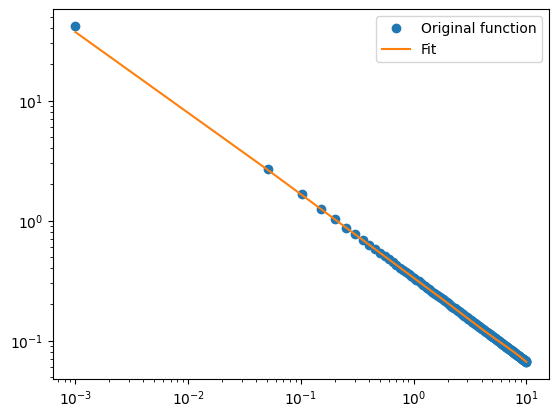

In [10]:
K_v = []
for time in t_data:
    K = 0.0
    for ck, tauk in zip(c_v, tau_v):
        K += (ck/tauk) * np.exp(-time/tauk)
    
    K_v.append(K)


plt.figure()
plt.loglog(t_data, data, 'o', label='Original function')
plt.loglog(t_data, K_v, label='Fit')
plt.legend()
plt.show()

Initial values

In [11]:
x0 = 0.0
v0 = 0.0
s0 = np.zeros(Nk)
time = 0 # Initial time

# Set the values
x = x0
v = v0
s = s0


$\theta_k$ and $\alpha_k$ values

Method 1

In [12]:
theta = np.zeros(Nk)
alpha = np.zeros(Nk)

for k in range(Nk):
    theta[k] = 1 - TIME_STEP / tau_v[k]
    alpha[k] = np.sqrt(TIME_STEP) / tau_v[k]


Generalized Langevin Equation (GLE) integration

Unidimensional (at the moment)

In [13]:
REP = 400

msd = np.zeros(N_STEP)

# Coefficients to improve efficiency
TS2M = TIME_STEP / (2 * MASS)
tcoeff = np.sqrt(2 * KT * c_v)

for rep in range(REP):

    if rep%10 == 0:
        print(rep)

    # Set the  initial values
    x = x0
    v = v0
    s = s0
    time = 0.0

    time_v = []
    pos = []
    vel = []

    for _ in range(N_STEP):
        # Random number generation
        B = np.random.normal(0, 1, Nk)
        
        # Update v half step
        v = v + TS2M * (FC + np.sum(s))

        # Update x a complete step
        x = x + TIME_STEP * v

        # Update every sk a complete step
        for k, sk in enumerate(s):
            s[k] = theta[k] * s[k] - (1 - theta[k]) * c_v[k] * v + alpha[k] * tcoeff[k] * B[k] 

        # Update v for other half step
        v = v + TS2M * (FC + np.sum(s))

        time += TIME_STEP
        
        time_v.append(time)
        pos.append(x)
        vel.append(v)
    
    msd += np.multiply(pos, pos)

msd = msd / REP

0


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390


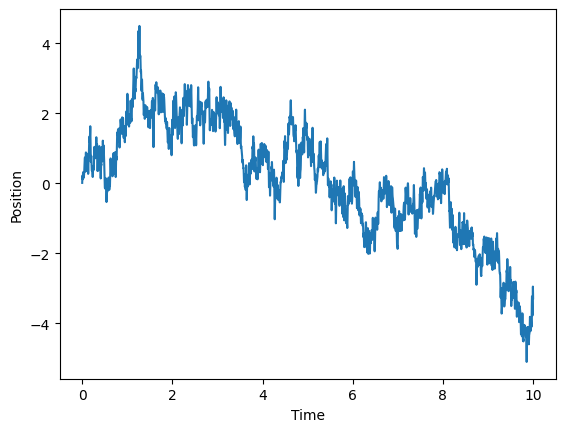

In [14]:
plt.figure()
plt.plot(time_v, pos)
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

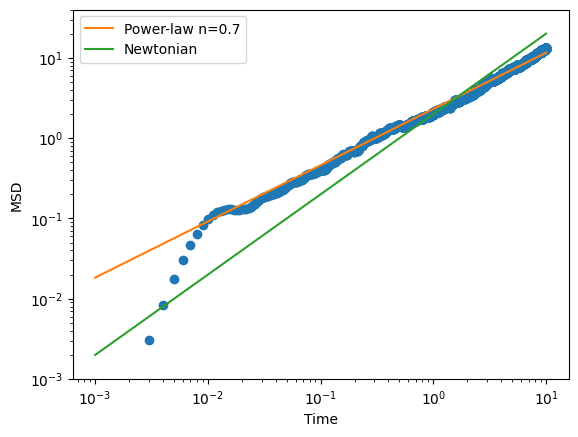

In [15]:
plt.figure()
plt.loglog(time_v, msd, 'o')
plt.loglog(time_v, 2 * KT * np.sin(npower*np.pi) / (npower * GAMMA) * np.power(time_v, npower), label='Power-law n='+str(npower))
plt.loglog(time_v, 2 * KT / GAMMA * np.array(time_v), label='Newtonian')
plt.legend()
plt.xlabel('Time')
plt.ylabel('MSD')
plt.ylim(1e-3, 4e1)
plt.show()

## Jeffreys Kernel

Library import

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

Parameter inicialization

In [17]:
KT = 1.0
GAMMA = 1.0
MASS = 5.0e-4

FC = 0.0

TIME_STEP = 0.001
N_STEP = 10000

Prony parameters

El tamaño de ck y tk tiene que coincidir con Nk

In [18]:
def prony(t, F, m):
    #  Input  : real arrays t, F of the same size (ti, Fi)
    #         : integer m - the number of modes in the exponential fit
    #  Output : arrays a and b such that F(t) ~ sum ai exp(bi*t)"""

	# Solve LLS problem in step 1
	# Amat is (N-m)*m and bmat is N-m*1
	N    = len(t)
	Amat = np.zeros((N-m, m))
	bmat = F[m:N]

	for jcol in range(m):
		Amat[:, jcol] = F[m-jcol-1:N-1-jcol]
		
	sol = np.linalg.lstsq(Amat, bmat)
	d = sol[0]

	# Solve the roots of the polynomial in step 2
	# first, form the polynomial coefficients
	c = np.zeros(m+1)
	c[m] = 1.
	for i in range(1,m+1):
		c[m-i] = -d[i-1]

	u = poly.polyroots(c)
	b_est = np.log(u)/(t[1] - t[0])

	# Set up LLS problem to find the "a"s in step 3
	Amat = np.zeros((N, m))
	bmat = F

	for irow in range(N):
		Amat[irow, :] = u**irow
		
	sol = np.linalg.lstsq(Amat, bmat)
	a_est = sol[0]

	return a_est, -b_est

In [19]:
Nk = 1 # Number of Prony modes
# c_v = [0.25]
# tau_v = [0.25]

# if len(c_v) != Nk or len(tau_v) != Nk:
#     print('### ERROR ###')
#     print('EL TAMAÑO DE CK Y TK TIENE QUE COINCIDIR CON EL NÚMERO DE MODOS DE PRONY')

Exponential kernel

In [20]:
q = 10
tau_m = 1.0

t_data = np.linspace(TIME_STEP, N_STEP*TIME_STEP, 200)
data = q * GAMMA / tau_m * np.exp(-t_data / tau_m)

# Fit the Prony model to the function 'data' to obtain the Prony coefficients
a_v, b_v = prony(t_data, data, Nk)

/tmp/ipykernel_26008/855062173.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol = np.linalg.lstsq(Amat, bmat)
/tmp/ipykernel_26008/855062173.py:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol = np.linalg.lstsq(Amat, bmat)


In [21]:
# Convert the coefficients of the fit to ck and tauk
tau_v = 1.0 / b_v
c_v = a_v * tau_v

In [22]:
print('ak coefficients', a_v)
print('bk coefficients', b_v)

ak coefficients [9.990005]
bk coefficients [1.]


In [23]:
print('C coefficients', c_v)
print('tau coefficients', tau_v)

C coefficients [9.990005]
tau coefficients [1.]


Plot of the kernel function and its fit

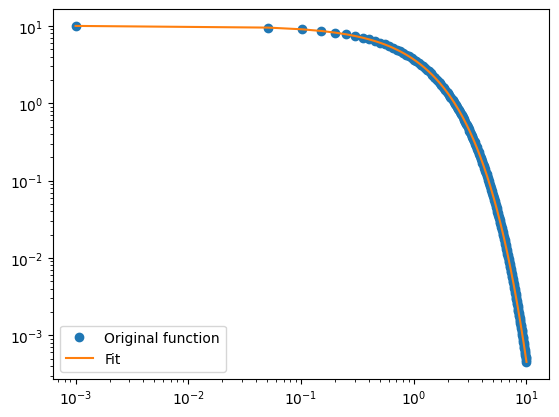

In [24]:
K_v = []
for time in t_data:
    K = 0.0
    for ck, tauk in zip(c_v, tau_v):
        K += (ck/tauk) * np.exp(-time/tauk)
    
    K_v.append(K)


plt.figure()
plt.loglog(t_data, data, 'o', label='Original function')
plt.loglog(t_data, K_v, label='Fit')
plt.legend()
plt.show()

Initial values

In [25]:
x0 = 0.0
v0 = 0.0
s0 = np.zeros(Nk)
time = 0 # Initial time

# Set the values
x = x0
v = v0
s = s0


$\theta_k$ and $\alpha_k$ values

Method 1

In [26]:
theta = np.zeros(Nk)
alpha = np.zeros(Nk)

for k in range(Nk):
    theta[k] = 1 - TIME_STEP / tau_v[k]
    alpha[k] = np.sqrt(TIME_STEP) / tau_v[k]


Generalized Langevin Equation (GLE) integration

Unidimensional (at the moment)

In [27]:
FbN = np.sqrt(2 * KT * GAMMA / TIME_STEP)

In [28]:
REP = 400

msd = np.zeros(N_STEP)

# Coefficients to improve efficiency
TS2M = TIME_STEP / (2 * MASS)
tcoeff = np.sqrt(2 * KT * c_v)

for rep in range(REP):

    if rep%10 == 0:
        print(rep)

    # Set the  initial values
    x = x0
    v = v0
    s = s0
    time = 0.0

    time_v = []
    pos = []
    vel = []

    for _ in range(N_STEP):
        # Random number generation
        B = np.random.normal(0, 1, Nk)
        Bn = np.random.normal(0, 1, 1)
        
        # Update v half step
        v = v + TS2M * (FC - GAMMA * v + FbN * Bn[0] + np.sum(s))
  
        # Update x a complete step
        x = x + TIME_STEP * v

        # Update every sk a complete step
        for k, sk in enumerate(s):
            s[k] = theta[k] * s[k] - (1 - theta[k]) * c_v[k] * v + alpha[k] * tcoeff[k] * B[k] 

        # Update v for other half step
        v = v + TS2M * (FC - GAMMA * v + FbN * Bn[0] + np.sum(s))

        time += TIME_STEP
        
        time_v.append(time)
        pos.append(x)
        vel.append(v)
    
    msd += np.multiply(pos, pos)

msd = msd / REP

0


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390


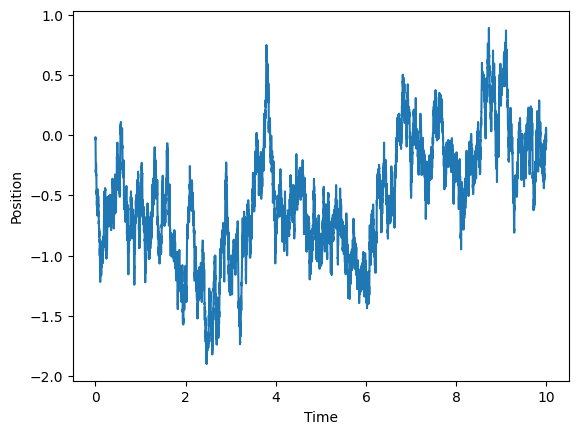

In [29]:
plt.figure()
plt.plot(time_v, pos)
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

In [30]:
def msd_theo(t,kT,q,zeta_v,tau_m):
    return 2*kT*(t + q/(1+q) * tau_m * (1 - np.exp(-(1+q)*t/tau_m)))/(zeta_v*(1+q))

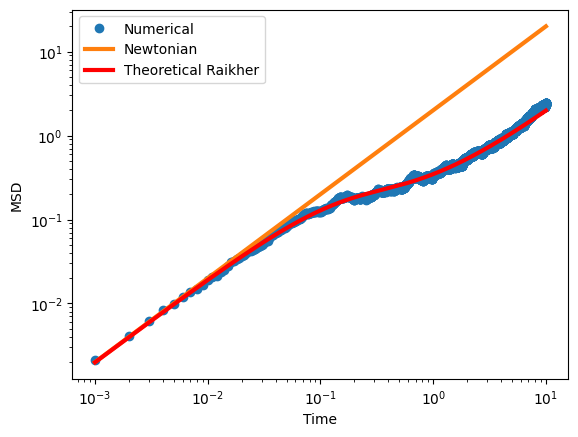

In [31]:
plt.figure()
plt.loglog(time_v, msd, 'o', label='Numerical')
#plt.loglog(time_v, 2 * KT * np.sin(npower*np.pi) / (npower * GAMMA) * np.power(time_v, npower), label='Power-law n='+str(npower))
plt.loglog(time_v, 2 * KT / GAMMA * np.array(time_v), label='Newtonian', linewidth = 3.0)
plt.loglog(time_v, msd_theo(np.array(time_v), KT, q, GAMMA, tau_m), label='Theoretical Raikher', linewidth = 3.0, color='r')
plt.legend()
plt.xlabel('Time')
plt.ylabel('MSD')
#plt.ylim(1e-2, 1e1)
plt.show()

## Inertialess limit

Library import

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

Parameter inicialization

In [33]:
KT = 1.0
GAMMA = 1.0
MASS = 5.0e-4

FC = 0.0

TIME_STEP = 0.001
N_STEP = 10000

Prony parameters

El tamaño de ck y tk tiene que coincidir con Nk

In [34]:
def prony(t, F, m):
    #  Input  : real arrays t, F of the same size (ti, Fi)
    #         : integer m - the number of modes in the exponential fit
    #  Output : arrays a and b such that F(t) ~ sum ai exp(bi*t)"""

	# Solve LLS problem in step 1
	# Amat is (N-m)*m and bmat is N-m*1
	N    = len(t)
	Amat = np.zeros((N-m, m))
	bmat = F[m:N]

	for jcol in range(m):
		Amat[:, jcol] = F[m-jcol-1:N-1-jcol]
		
	sol = np.linalg.lstsq(Amat, bmat)
	d = sol[0]

	# Solve the roots of the polynomial in step 2
	# first, form the polynomial coefficients
	c = np.zeros(m+1)
	c[m] = 1.
	for i in range(1,m+1):
		c[m-i] = -d[i-1]

	u = poly.polyroots(c)
	b_est = np.log(u)/(t[1] - t[0])

	# Set up LLS problem to find the "a"s in step 3
	Amat = np.zeros((N, m))
	bmat = F

	for irow in range(N):
		Amat[irow, :] = u**irow
		
	sol = np.linalg.lstsq(Amat, bmat)
	a_est = sol[0]

	return a_est, -b_est

In [35]:
Nk = 1 # Number of Prony modes
# c_v = [0.25]
# tau_v = [0.25]

# if len(c_v) != Nk or len(tau_v) != Nk:
#     print('### ERROR ###')
#     print('EL TAMAÑO DE CK Y TK TIENE QUE COINCIDIR CON EL NÚMERO DE MODOS DE PRONY')

Exponential kernel

In [36]:
q = 10
tau_m = 1.0

t_data = np.linspace(TIME_STEP, N_STEP*TIME_STEP, 200)
data = q * GAMMA / tau_m * np.exp(-t_data / tau_m)

# Fit the Prony model to the function 'data' to obtain the Prony coefficients
a_v, b_v = prony(t_data, data, Nk)

/tmp/ipykernel_26008/855062173.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol = np.linalg.lstsq(Amat, bmat)
/tmp/ipykernel_26008/855062173.py:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol = np.linalg.lstsq(Amat, bmat)


In [37]:
# Convert the coefficients of the fit to ck and tauk
tau_v = 1.0 / b_v
c_v = a_v * tau_v

In [38]:
print('ak coefficients', a_v)
print('bk coefficients', b_v)

ak coefficients [9.990005]
bk coefficients [1.]


In [39]:
print('C coefficients', c_v)
print('tau coefficients', tau_v)

C coefficients [9.990005]
tau coefficients [1.]


Plot of the kernel function and its fit

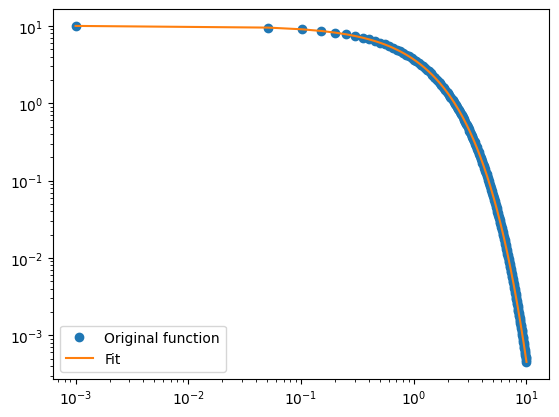

In [40]:
K_v = []
for time in t_data:
    K = 0.0
    for ck, tauk in zip(c_v, tau_v):
        K += (ck/tauk) * np.exp(-time/tauk)
    
    K_v.append(K)


plt.figure()
plt.loglog(t_data, data, 'o', label='Original function')
plt.loglog(t_data, K_v, label='Fit')
plt.legend()
plt.show()

Initial values

In [41]:
x0 = 0.0
v0 = 0.0
s0 = np.zeros(Nk)
time = 0 # Initial time

# Set the values
x = x0
v = v0
s = s0


$\theta_k$ and $\alpha_k$ values

Method 1

In [42]:
theta = np.zeros(Nk)
alpha = np.zeros(Nk)

for k in range(Nk):
    theta[k] = 1 - TIME_STEP / tau_v[k]
    alpha[k] = np.sqrt(TIME_STEP) / tau_v[k]


Generalized Langevin Equation (GLE) integration

Unidimensional (at the moment)

In [43]:
FbN = np.sqrt(2 * KT * GAMMA / TIME_STEP)

In [44]:
REP = 400

msd = np.zeros(N_STEP)

# Coefficients to improve efficiency
tcoeff = np.sqrt(2 * KT * c_v)

for rep in range(REP):

    if rep%10 == 0:
        print(rep)

    # Set the  initial values
    x = x0
    v = v0
    s = s0
    time = 0.0

    time_v = []
    pos = []
    vel = []

    for _ in range(N_STEP):
        # Random number generation
        B = np.random.normal(0, 1, Nk)
        Bn = np.random.normal(0, 1, 1)
        
        # Update v 
        v = (FC + FbN * Bn[0] + np.sum(s)) / GAMMA
  
        # Update x a complete step
        x = x + TIME_STEP * v

        # Update every sk a complete step
        for k, sk in enumerate(s):
            s[k] = theta[k] * s[k] - (1 - theta[k]) * c_v[k] * v + alpha[k] * tcoeff[k] * B[k] 


        time += TIME_STEP
        
        time_v.append(time)
        pos.append(x)
        vel.append(v)
    
    msd += np.multiply(pos, pos)

msd = msd / REP

0


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390


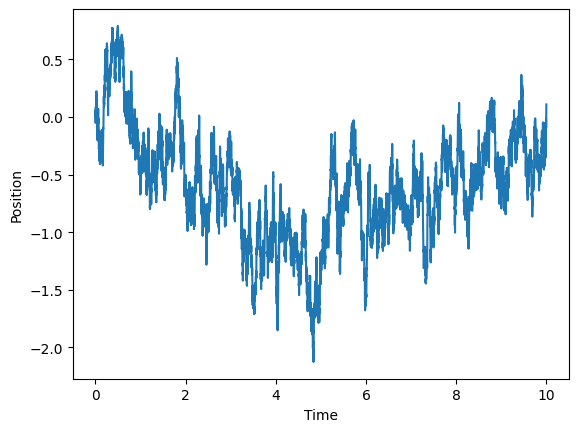

In [45]:
plt.figure()
plt.plot(time_v, pos)
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

In [46]:
def msd_theo(t,kT,q,zeta_v,tau_m):
    return 2*kT*(t + q/(1+q) * tau_m * (1 - np.exp(-(1+q)*t/tau_m)))/(zeta_v*(1+q))

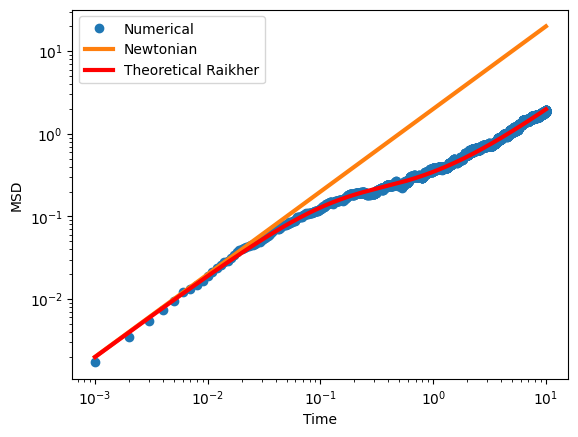

In [47]:
plt.figure()
plt.loglog(time_v, msd, 'o', label='Numerical')
#plt.loglog(time_v, 2 * KT * np.sin(npower*np.pi) / (npower * GAMMA) * np.power(time_v, npower), label='Power-law n='+str(npower))
plt.loglog(time_v, 2 * KT / GAMMA * np.array(time_v), label='Newtonian', linewidth = 3.0)
plt.loglog(time_v, msd_theo(np.array(time_v), KT, q, GAMMA, tau_m), label='Theoretical Raikher', linewidth = 3.0, color='r')
plt.legend()
plt.xlabel('Time')
plt.ylabel('MSD')
#plt.ylim(1e-2, 1e1)
plt.show()